In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
import pickle

In [2]:
def sigmoid(z):
    return 1.0/(1.0+np.exp(-z))

def sigmoid_prime(z):
    return sigmoid(z)*(1-sigmoid(z))

#def relu(z):
#    if z > 0:
#        return z
#    else:
#        return 0
    
#def reluprime(z):
#    if z > 0:
#        return 1
#    else:
#        return 0
    
#def sigmoid(z):
#    newz = np.zeros_like(z)
#    for row in range(z.shape[0]):
#        newz[row][0] = relu(z[row][0])
#
#    return newz
    
#def sigmoid_prime(z):
#    newz = np.zeros_like(z)
#    for row in range(z.shape[0]):
#        newz[row][0] = reluprime(z[row][0])
#
#    return newz

In [3]:
class network:

    def __init__(self,layers,activation,activationPrime):

        self.act = activation
        self.actPrime = activationPrime

        self.layers = layers

        self.biases = []
        for i in range(len(layers) - 1):
            self.biases.append(np.random.randn(layers[i+1],1))

        self.weights = []
        for i in range(len(layers) - 1):
            self.weights.append(np.random.randn(layers[i+1],layers[i]))

    def saveModel(self,filename):
        with open(filename,'wb+') as f:
            f.write(pickle.dumps((self.layers,self.weights,self.biases)))

    def loadModel(self,filename):
        with open(filename,"rb") as f:
            self.layers,self.weights,self.biases = pickle.loads(f.read())
        
    def train(self,inp,target):

        biasDeriv = [np.zeros(b.shape) for b in self.biases]
        weightsDeriv = [np.zeros(w.shape) for w in self.weights]

        activation = inp
        activations = [inp]

        zs = []

        for i in range(len(self.layers)-1):
            activation = np.dot(self.weights[i],activation) + self.biases[i]
            zs.append(activation)
            activation = self.act(activation)
            activations.append(activation)

        #print(activations)

        delta = self.cost_derivative(activations[-1], target) * self.actPrime(zs[-1])

        biasDeriv[-1] = delta
        #print(delta)
        #print(np.transpose(activations[-2]))
        weightsDeriv[-1] = np.dot(delta, activations[-2].T)

        for l in range(2, len(self.layers)):
            z = zs[-l]
            sp = self.actPrime(z)
            delta = np.dot(self.weights[-l+1].transpose(), delta) * sp
            biasDeriv[-l] = delta
            weightsDeriv[-l] = np.dot(delta, activations[-l-1].T)
        
        return biasDeriv,weightsDeriv
    
    def trainBatch(self,data,learningRate):
        weightsChange = [np.zeros(w.shape) for w in self.weights]
        biasChange = [np.zeros(b.shape) for b in self.biases]

        for inp,result in data:
            biasderiv, weightsDeriv = self.train(inp,result)

            biasChange = [total+new for total,new in zip(biasChange,biasderiv)]
            weightsChange = [total+new for total,new in zip(weightsChange,weightsDeriv)]

        self.weights = [current - (learningRate/len(data)) * change for current,change in zip(self.weights,weightsChange)]
        self.biases = [current - (learningRate/len(data)) * change for current,change in zip(self.biases,biasChange)]

    def cost_derivative(self, output_activations, y):
        """Return the vector of partial derivatives \partial C_x /
        \partial a for the output activations."""
        return (output_activations-y)
    
    def forwardPropagate(self,inp):

        activation = inp

        for i in range(len(self.layers)-1):
            activation = np.dot(self.weights[i],activation) + self.biases[i]
            activation = self.act(activation)

        return activation
    
    def forwardCost(self,inp,target):
        return (self.forwardPropagate(inp) - target)**2



[[0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000, 2100, 2200, 2300, 2400, 2500, 2600, 2700, 2800, 2900, 3000, 3100, 3200, 3300, 3400, 3500, 3600, 3700, 3800, 3900, 4000, 4100, 4200, 4300, 4400, 4500, 4600, 4700, 4800, 4900, 5000, 5100, 5200, 5300, 5400, 5500, 5600, 5700, 5800, 5900, 6000, 6100, 6200, 6300, 6400, 6500, 6600, 6700, 6800, 6900, 7000, 7100, 7200, 7300, 7400, 7500, 7600, 7700, 7800, 7900, 8000, 8100, 8200, 8300, 8400, 8500, 8600, 8700, 8800, 8900, 9000, 9100, 9200, 9300, 9400, 9500, 9600, 9700, 9800, 9900, 10000, 10100, 10200, 10300, 10400, 10500, 10600, 10700, 10800, 10900, 11000, 11100, 11200, 11300, 11400, 11500, 11600, 11700, 11800, 11900, 12000, 12100, 12200, 12300, 12400, 12500, 12600, 12700, 12800, 12900, 13000, 13100, 13200, 13300, 13400, 13500, 13600, 13700, 13800, 13900, 14000, 14100, 14200, 14300, 14400, 14500, 14600, 14700, 14800, 14900, 15000, 15100, 15200, 15300, 15400, 15500, 15600, 15700, 1580

ValueError: shapes (5,2) and (1,1) not aligned: 2 (dim 1) != 1 (dim 0)

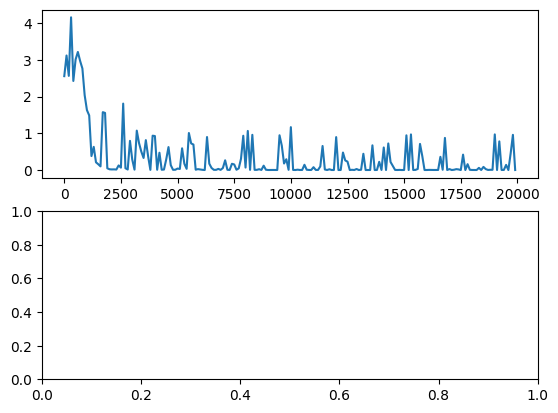

In [4]:
net = network([2,5,5,5,2],sigmoid,sigmoid_prime)

def func(x1,x2):
    return bool(round(x1))^bool(round(x2)),  bool(round(x1)) and bool(round(x2))
    
data = [[],[]]

for x in range(20000):

    batch = []
    for i in range(10):
        a = np.random.rand()
        b = np.random.rand()
        xor,ad = func(a,b)
        batch.append((np.array([[a],[b]]),np.array([[xor],[ad]])))
    net.trainBatch(batch,5)

    if x % 100 == 0:
        cost = 0
        for i in range(10):
            a = np.random.rand()
            b = np.random.rand()
            xor,ad = func(a,b)
            cost += net.forwardCost(np.array([[a],[b]]),np.array([[xor],[ad]]))

        data[0].append(x)
        data[1].append(cost[0][0])

print(data)

fig, ax = plt.subplots(2)
ax[0].plot(data[0],data[1])
x = []
y = []
for i in range(100):
    x.append(-1 + 2* (i/100))
    y.append([])
    y[-1].append(net.forwardPropagate(np.array([[x[-1]]]))[0][0])
    y[-1].append(func(x[-1]))

print(x,y)
ax[1].plot(x,y)

net.saveModel("20000Trained.net")

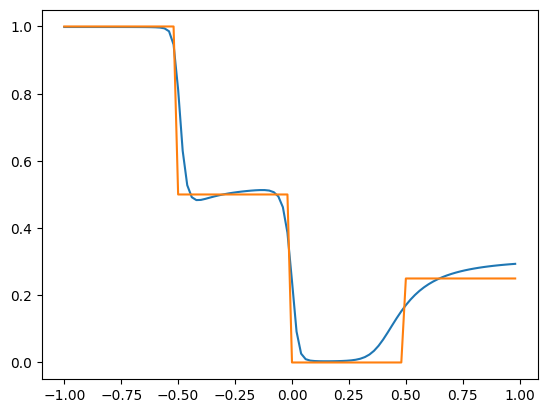

In [ ]:
net.loadModel("20000Trained.net")

x = []
y = []
for i in range(100):
    x.append(-1 + 2* (i/100))
    y.append([])
    y[-1].append(net.forwardPropagate(np.array([[x[-1]]]))[0][0])
    y[-1].append(func(x[-1]))


plt.plot(x,y)